In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c9185c03b56d15ae8863cd6b452e190


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | moron
Processing Record 5 of Set 1 | hofn
Processing Record 6 of Set 1 | isangel
Processing Record 7 of Set 1 | xining
Processing Record 8 of Set 1 | kruisfontein
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | svetlaya
Processing Record 12 of Set 1 | omsukchan
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | buin
Processing Record 23 of Set 1 | nort

Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | nelson bay
Processing Record 41 of Set 4 | guadalajara
Processing Record 42 of Set 4 | kamenka
Processing Record 43 of Set 4 | vanimo
Processing Record 44 of Set 4 | half moon bay
Processing Record 45 of Set 4 | kingman
Processing Record 46 of Set 4 | hillsborough
Processing Record 47 of Set 4 | tirat karmel
Processing Record 48 of Set 4 | lebane
Processing Record 49 of Set 4 | san quintin
Processing Record 50 of Set 4 | nome
Processing Record 1 of Set 5 | durban
Processing Record 2 of Set 5 | tasbuget
City not found. Skipping...
Processing Record 3 of Set 5 | biak
Processing Record 4 of Set 5 | semirom
Processing Record 5 of Set 5 | vorukh
Processing Record 6 of Set 5 | rawson
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | lorengau
Processing Record 9 of Set 5 | aasiaat
Processing Record 10 of Set 5 | tasiilaq
Processing Record 11 of Set 5 | ambodifototra
City not found. Skipping...
Processing Re

Processing Record 28 of Set 8 | ketchikan
Processing Record 29 of Set 8 | scranton
Processing Record 30 of Set 8 | lilongwe
Processing Record 31 of Set 8 | meulaboh
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | primorsko-akhtarsk
Processing Record 34 of Set 8 | turukhansk
Processing Record 35 of Set 8 | alugan
Processing Record 36 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 8 | narsaq
Processing Record 38 of Set 8 | kununurra
Processing Record 39 of Set 8 | port blair
Processing Record 40 of Set 8 | wajid
Processing Record 41 of Set 8 | ayagoz
Processing Record 42 of Set 8 | ariyalur
Processing Record 43 of Set 8 | east london
Processing Record 44 of Set 8 | sobolevo
Processing Record 45 of Set 8 | lodwar
Processing Record 46 of Set 8 | livani
Processing Record 47 of Set 8 | agaro
Processing Record 48 of Set 8 | mrirt
City not found. Skipping...
Processing Record 49 of Set 8 | lichinga
Processing Record 50 of Set 8 | kytlym
City

Processing Record 13 of Set 12 | mubende
Processing Record 14 of Set 12 | temaraia
City not found. Skipping...
Processing Record 15 of Set 12 | lolua
City not found. Skipping...
Processing Record 16 of Set 12 | norman wells
Processing Record 17 of Set 12 | glenwood springs
Processing Record 18 of Set 12 | kazachinskoye
Processing Record 19 of Set 12 | nagapattinam
Processing Record 20 of Set 12 | ambunti
Processing Record 21 of Set 12 | yarada
Processing Record 22 of Set 12 | coquimbo
Processing Record 23 of Set 12 | igbon
Processing Record 24 of Set 12 | buariki
City not found. Skipping...
Processing Record 25 of Set 12 | manokwari
Processing Record 26 of Set 12 | pauini
Processing Record 27 of Set 12 | honningsvag
Processing Record 28 of Set 12 | kudahuvadhoo
Processing Record 29 of Set 12 | kavaratti
Processing Record 30 of Set 12 | camargo
Processing Record 31 of Set 12 | sinkat
City not found. Skipping...
Processing Record 32 of Set 12 | bur gabo
City not found. Skipping...
Proces

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,46.00,70,47,5.01,NZ,2020-10-07 06:50:39
1,Castro,-24.79,-50.01,61.39,97,80,4.34,BR,2020-10-07 06:50:40
2,Torbay,47.67,-52.73,50.00,93,75,14.99,CA,2020-10-07 06:50:40
3,Moron,-34.65,-58.62,57.99,94,65,3.53,AR,2020-10-07 06:50:40
4,Hofn,64.25,-15.21,47.35,94,100,4.29,IS,2020-10-07 06:50:40
5,Isangel,-19.55,169.27,77.00,69,40,5.82,VU,2020-10-07 06:50:41
6,Xining,36.62,101.77,61.93,31,0,2.04,CN,2020-10-07 06:50:41
7,Kruisfontein,-34.00,24.73,69.78,48,0,4.72,ZA,2020-10-07 06:50:41
8,Tiksi,71.69,128.87,26.78,96,94,28.52,RU,2020-10-07 06:50:41
9,Hermanus,-34.42,19.23,62.13,77,0,2.91,ZA,2020-10-07 06:50:42


In [11]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2020-10-07 06:50:39,-46.60,168.33,46.00,70,47,5.01
1,Castro,BR,2020-10-07 06:50:40,-24.79,-50.01,61.39,97,80,4.34
2,Torbay,CA,2020-10-07 06:50:40,47.67,-52.73,50.00,93,75,14.99
3,Moron,AR,2020-10-07 06:50:40,-34.65,-58.62,57.99,94,65,3.53
4,Hofn,IS,2020-10-07 06:50:40,64.25,-15.21,47.35,94,100,4.29
...,...,...,...,...,...,...,...,...,...
553,Suhut,TR,2020-10-07 06:53:05,38.53,30.55,60.80,48,78,4.70
554,Teya,RU,2020-10-07 06:53:05,60.38,92.63,34.90,85,100,11.97
555,Tamandare,BR,2020-10-07 06:53:05,-8.76,-35.10,73.90,86,14,6.55
556,Sabha,LY,2020-10-07 06:53:06,27.04,14.43,83.82,17,0,9.86


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

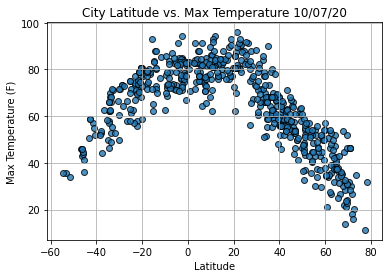

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
import time
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

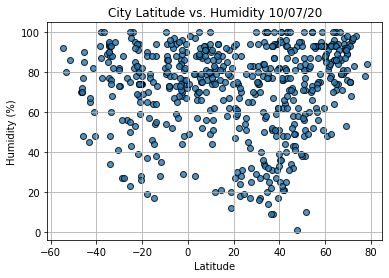

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
import time
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

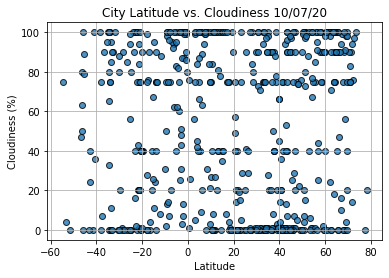

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
import time
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

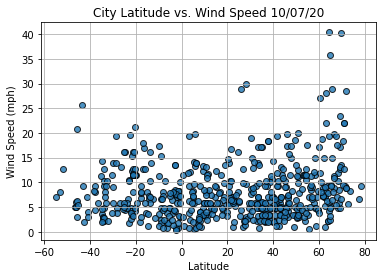

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (<ipython-input-18-74ef196e6b19>, line 3)

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title("title")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Hasaki
Country                        JP
Date          2020-10-07 06:50:42
Lat                         35.73
Lng                        140.83
Max Temp                     64.4
Humidity                       82
Cloudiness                     90
Wind Speed                   5.82
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
553     True
554     True
555    False
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Torbay,CA,2020-10-07 06:50:40,47.67,-52.73,50.00,93,75,14.99
4,Hofn,IS,2020-10-07 06:50:40,64.25,-15.21,47.35,94,100,4.29
6,Xining,CN,2020-10-07 06:50:41,36.62,101.77,61.93,31,0,2.04
8,Tiksi,RU,2020-10-07 06:50:41,71.69,128.87,26.78,96,94,28.52
10,Svetlaya,RU,2020-10-07 06:50:42,46.54,138.33,57.56,54,7,4.09


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

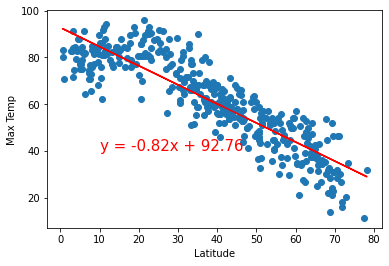

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

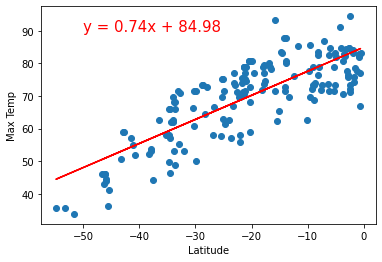

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

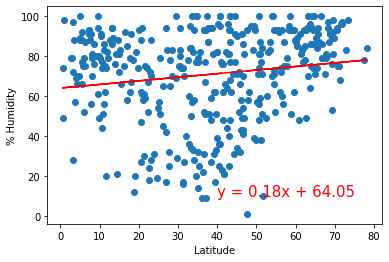

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

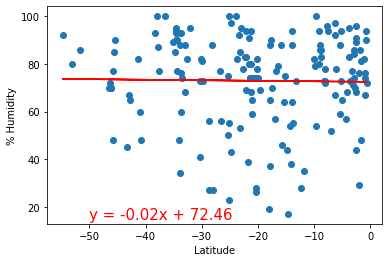

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

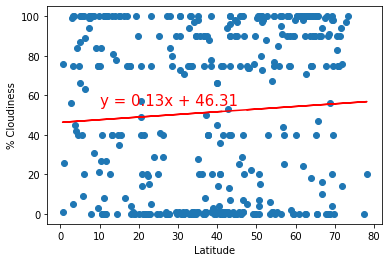

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))

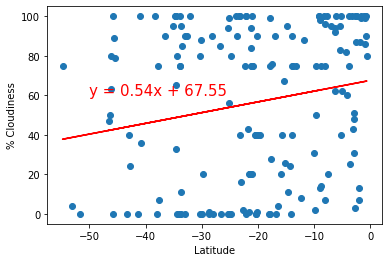

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

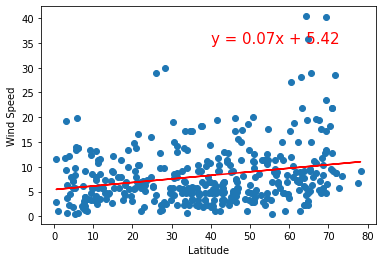

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

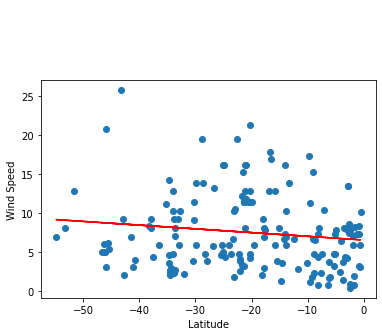

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))